In [40]:
import os
import sys
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat, savemat
import statsmodels.api as sm # import statsmodels
import statsmodels.formula.api as smf

import matplotlib as mpl
from matplotlib import pyplot as plt
import math

In [2]:
#load my pvals
pvals = pd.read_csv('../permres_pvals.csv',header=None)
pvals.rename(columns={0: "p"}, inplace=True)
pvals #one significant lv

p
0  0.000800
1  0.218156
2  0.463907
3  0.999800

In [3]:
#load my covar explained
var_exp = pd.read_csv('../varexp.csv',header=None)
var_exp.rename(columns={0: "var"}, inplace=True)
var_exp #lv one explains 72.7% (LOTS)

var
0  0.727024
1  0.162257
2  0.107339
3  0.003381

In [4]:
#should do a screee plot here....

In [5]:
#load my bsr
df_bsr = pd.read_csv('../bootres_x_weights_normed.csv',header=None)
df_bsr.rename(columns={0: "LV1",1:"LV2",2:"LV3",3:"LV4"}, inplace=True)
df_bsr #components 1,2,3 contribute to lv2. c4 is close

LV1       LV2       LV3       LV4
0  3.830417  2.176927 -3.019375 -1.287982
1  3.935629 -1.074354  2.460988 -0.584137
2 -4.389306  1.668615  1.534042 -1.513469
3 -1.758350 -4.651891 -1.735486 -1.017590

In [6]:
#load my brain variables (input x)
df_x_brain = pd.read_csv('../x_brain_k4.csv')
print(df_x_brain.head())
brain_variables = df_x_brain.columns.tolist()
brain_variables

   Comp1_coupling  Comp2_coupling  Comp3_coupling  Comp4_coupling
0        0.717454        0.398154        0.325651        0.108369
1        0.323681        0.020280        1.019144        0.541393
2        0.697106        0.287404        0.550734        0.102591
3        0.344725        0.419427        0.588132        0.344262
4        0.734624        0.353754        0.488739        0.161713


['Comp1_coupling', 'Comp2_coupling', 'Comp3_coupling', 'Comp4_coupling']

In [7]:
#load my behav variables (input y)
df_y_behav = pd.read_csv('../../y_behavs.csv')
print(df_y_behav.head())
behav_variables = df_y_behav.columns.tolist()
behav_variables

   PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  PMAT24_A_SI  \
0          84.24           107.87           96.52         21.0          0.0   
1          94.08           103.17           99.96         15.0          4.0   
2         130.24            98.08          107.54         15.0          4.0   
3         112.44            85.56           88.35         20.0          0.0   
4         101.07            88.74          105.67         19.0          0.0   

   PMAT24_A_RTCR  ReadEng_AgeAdj  PicVocab_AgeAdj  ProcSpeed_AgeAdj  \
0        12617.0        98.76199        113.57420            125.28   
1         6960.0       104.57000        105.12000            105.46   
2        18900.0        75.10873         84.61769            110.48   
3        21438.5        91.68657        103.63620             83.82   
4        12280.0       113.65840        111.47450             74.17   

   DDisc_AUC_200  DDisc_AUC_40K  VSPLOT_TC  VSPLOT_CRTE  VSPLOT_OFF  SCPT_SEN  \
0       0.136265 

['PicSeq_AgeAdj',
 'CardSort_AgeAdj',
 'Flanker_AgeAdj',
 'PMAT24_A_CR',
 'PMAT24_A_SI',
 'PMAT24_A_RTCR',
 'ReadEng_AgeAdj',
 'PicVocab_AgeAdj',
 'ProcSpeed_AgeAdj',
 'DDisc_AUC_200',
 'DDisc_AUC_40K',
 'VSPLOT_TC',
 'VSPLOT_CRTE',
 'VSPLOT_OFF',
 'SCPT_SEN',
 'SCPT_SPEC',
 'IWRD_TOT',
 'IWRD_RTC',
 'ListSort_AgeAdj']

In [8]:
behav_variables
behav_test_names=['EpiMem',
 'ExecFcn',
 'Inhibition',
 'FluidIntl_CR',
 'FluidIntl_SI',
 'FluidIntl_RTCR',
 'ReadingDecoding',
 'VocabCompr',
 'ProcSpeed',
 'DDisc_AUC_200',
 'DDisc_AUC_40K',
 'Spatial_TC',
 'Spatial_CRTE',
 'Spatial_OFF',
 'SustAttn_SEN',
 'SustAttn_SPEC',
 'VEpiMem_TOT',
 'VEpiMem_RTC',
 'WorkingMem']

In [9]:
#load my behav loadings
df_behav_loadings = pd.read_csv('../y_loadings.csv',header=None)
df_behav_loadings.rename(columns={0: "LV1",1:"LV2",2:"LV3",3:"LV4"}, inplace=True)
df_behav_loadings

LV1       LV2       LV3       LV4
0   0.106120 -0.014789 -0.092896  0.071090
1   0.071138  0.015505 -0.002389  0.048272
2   0.144986  0.004538 -0.087392  0.095408
3   0.044794 -0.050681  0.015228  0.011661
4  -0.033106  0.059011 -0.026917 -0.006667
5   0.013548 -0.023071  0.036986 -0.010438
6   0.068519 -0.048392  0.023309  0.056233
7   0.122398 -0.104697 -0.030693  0.106505
8   0.136176 -0.035196 -0.061360  0.105004
9   0.107015 -0.023721  0.023730  0.081831
10  0.129912 -0.015709  0.023319  0.074945
11  0.072676 -0.050269 -0.048681  0.024023
12  0.163514  0.108598 -0.039211  0.075933
13 -0.039218  0.139825  0.018621 -0.030582
14  0.013179  0.076859  0.109285  0.011621
15  0.066428 -0.004223  0.001571  0.027470
16  0.033284 -0.001636 -0.010637  0.016269
17  0.007122 -0.081328 -0.055059  0.049943
18  0.039516  0.030938 -0.025759  0.011403

In [10]:
df_behav_loadings.iloc[:,0].values

array([ 0.10612001,  0.07113807,  0.14498571,  0.04479447, -0.03310632,
        0.01354805,  0.06851852,  0.12239772,  0.13617645,  0.107015  ,
        0.12991164,  0.0726764 ,  0.16351419, -0.0392177 ,  0.01317871,
        0.06642827,  0.03328428,  0.00712211,  0.03951628])

In [11]:
i=0 #lv1
x_error = []
j=0 #behav 
y_loadings_ci = np.loadtxt("../y_loadings_ci/bootres_y_loadings_ci_behaviour_"+str(j)+".csv",delimiter=",")
print(y_loadings_ci)
y_load = df_behav_loadings.iloc[:,i].values
pair = y_loadings_ci[i]
print(pair)
print(y_load[j])
entry = [math.fabs(float((y_load[j]-pair[0]))),math.fabs(float((y_load[j]-pair[1])))]
print(entry)
x_error.append(entry)

[[ 0.04750321  0.10627999]
 [-0.07589214  0.04318923]
 [-0.14464306 -0.00452346]
 [-0.00408027  0.07068275]]
[0.04750321 0.10627999]
0.10612001189257776
[0.058616802542971864, 0.00015997895473555956]


In [12]:
i=0 #lv1
y_load = df_behav_loadings.iloc[:,i].values #get the behav corrs for LV i
x_error = []
alpha_list=[]
for j in range(0,len(behav_variables)):
    #get the confidence interval for this variable
    y_loadings_ci = np.loadtxt("../y_loadings_ci/bootres_y_loadings_ci_behaviour_"+str(j)+".csv",delimiter=",")
    #get the CI for behav j in lv i
    pair = y_loadings_ci[i]
    #compute pointestimate - lower and upper-pointestimate for behav j in LV i
    entry = [math.fabs(float((y_load[j]-pair[0]))),math.fabs(float((y_load[j]-pair[1])))]
    #append
    x_error.append(entry)
    if np.sum(pair) < np.max(pair):
        alpha_list.append(0.3)
    else:
        alpha_list.append(1)
x_error

[[0.058616802542971864, 0.00015997895473555956],
 [0.05429770629758601, 0.0022398111059848402],
 [0.1262270219316884, 0.038323904849760115],
 [0.121645994027254, 0.048575764551941195],
 [0.04308313045207819, 0.11575314823946371],
 [0.1099618921207558, 0.05537328701879377],
 [0.09849875458858066, 0.08826359215349568],
 [0.10181119641945716, 0.018964080192341443],
 [0.11921222397198206, 0.055330607648076596],
 [0.024369904986745405, 0.0407803222976421],
 [0.0957630720845228, 0.0703340583563059],
 [0.03280205021971399, 0.10349724413002656],
 [0.03327920774045434, 0.053814820920598416],
 [0.05368491890470337, 0.03988278480493344],
 [0.05626688117198357, 0.056722837653675515],
 [0.03617384411365292, 0.06284756747492727],
 [0.10675774920181574, 0.019444591393994425],
 [0.056702026666857516, 0.08205112417359271],
 [0.10089175850963811, 0.016797167129864295]]

In [13]:
alpha_list

[1, 1, 1, 0.3, 0.3, 0.3, 0.3, 1, 1, 1, 1, 1, 1, 0.3, 0.3, 1, 0.3, 1, 0.3]

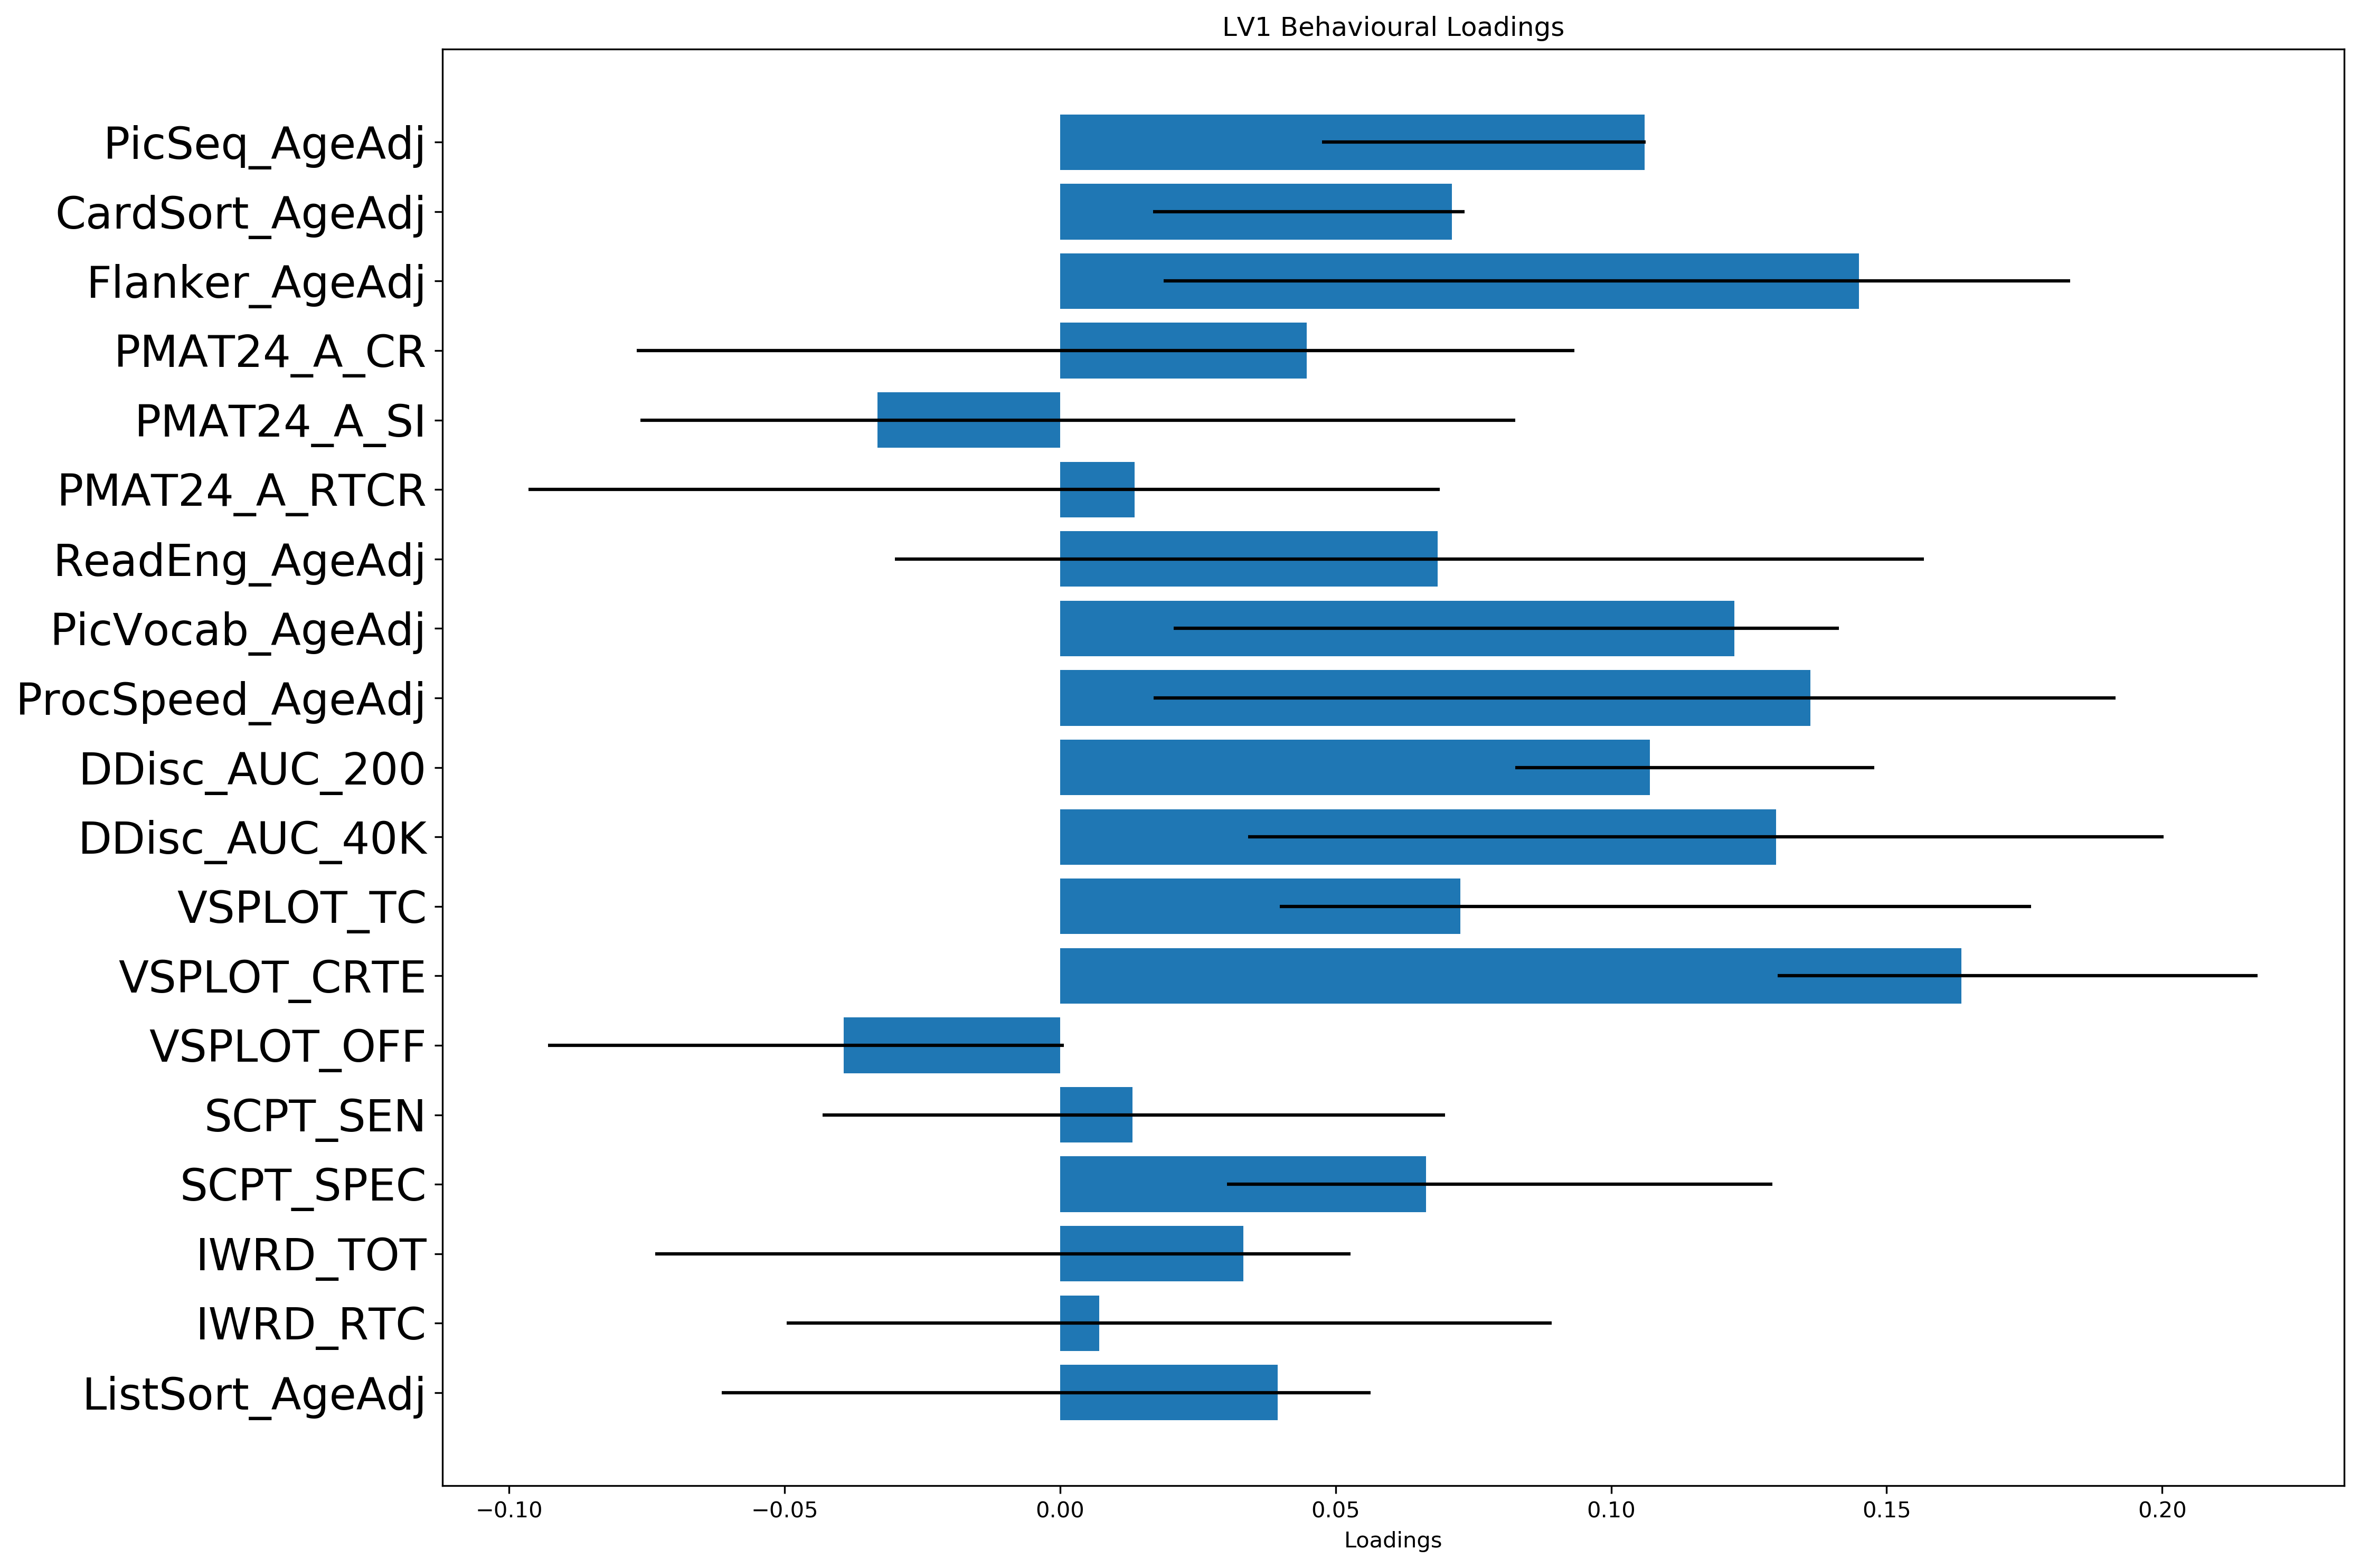

In [14]:
#plot
y_pos = np.arange(0,len(behav_variables))
fig, ax = plt.subplots(figsize=(15, 10),dpi=300)
ax.barh(y_pos, y_load,xerr=np.transpose(x_error), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(behav_variables,fontsize=20)
ax.invert_yaxis()
ax.set_xlabel('Loadings')
ax.set_title(f"LV{i+1} Behavioural Loadings")
plt.tight_layout()
#plt.savefig(f"{output_dir}/behavioural_loadings/LV_{i+1}",dpi=300)
plt.show()

In [15]:
newalpha=[]
for k in range(19):
    a=y_load[k]-np.transpose(x_error)[0,k]
    b=y_load[k]+np.transpose(x_error)[1,k]
    c=a*b
    if (c >= 0):
        newalpha.append(1)
    elif (c < 0):
        newalpha.append(0.3)

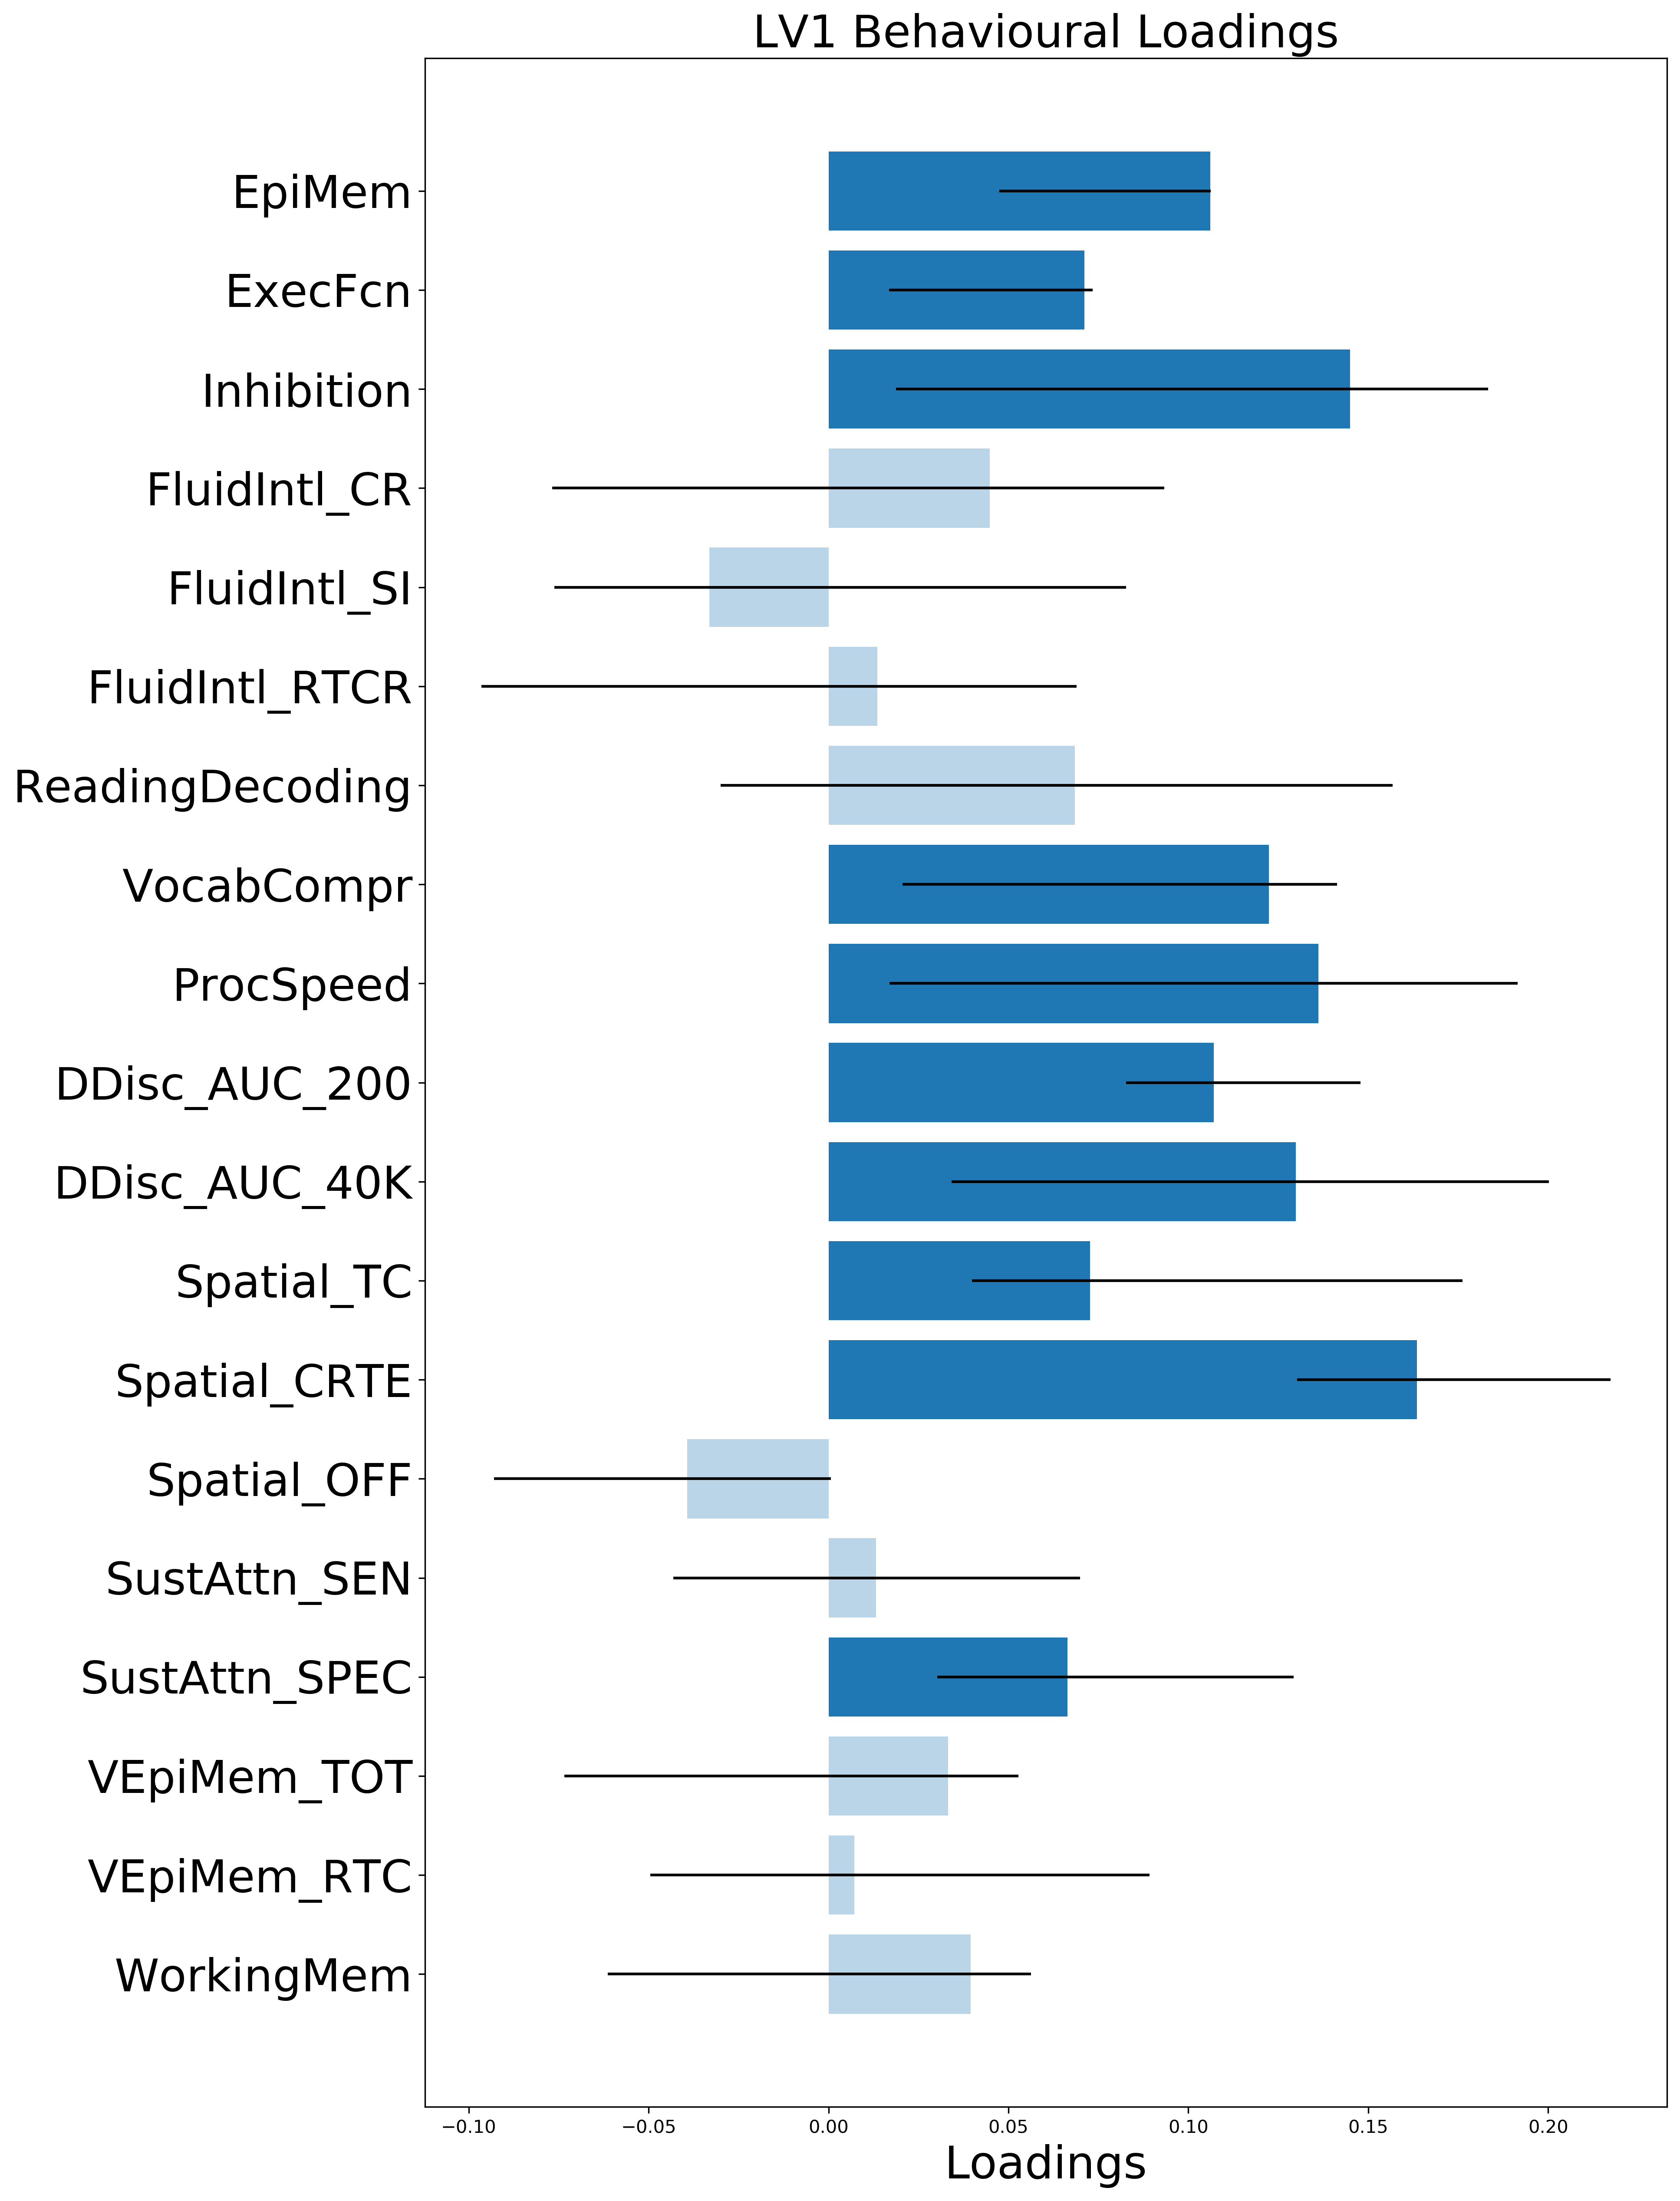

In [16]:
#plot
y_pos = np.arange(0,len(behav_variables))
fig, ax = plt.subplots(figsize=(13, 17),dpi=300)
for j in range(0,len(behav_variables)):
    ax.barh(y_pos[j], y_load[j],xerr=np.transpose(x_error)[:,j].reshape(2,1),
            align='center',color='tab:blue',alpha=newalpha[j])
ax.set_yticks(y_pos)
ax.set_yticklabels(behav_test_names,fontsize=25)
ax.invert_yaxis()
ax.set_xlabel('Loadings',fontsize=25)
ax.set_title(f"LV{i+1} Behavioural Loadings",fontsize=25)
plt.tight_layout()
#plt.savefig(f"{output_dir}/behavioural_loadings/LV_{i+1}",dpi=300)
plt.show()

In [17]:
#brain/behav scores vs age, sex
#load df with demo data
df_demo = pd.read_csv('../../df_nmf_cog_age_gender.csv')
df_demo

Subject  Comp1_coupling  Comp2_coupling  Comp3_coupling  Comp4_coupling  \
0     144832        0.717454        0.398154        0.325651        0.108369   
1     930449        0.323681        0.020280        1.019144        0.541393   
2     192136        0.697106        0.287404        0.550734        0.102591   
3     129634        0.344725        0.419427        0.588132        0.344262   
4     456346        0.734624        0.353754        0.488739        0.161713   
5     175338        0.363303        0.413890        0.504799        0.470397   
6     201414        0.421205        0.153435        0.669054        0.486413   
7     694362        0.606577        0.418018        0.252939        0.306546   
8     201717        0.670737        0.352013        0.294855        0.224963   
9     107422        0.681729        0.228037        0.348960        0.375839   
10    970764        0.433461        0.539085        0.215038        0.280580   
11    101107        0.419394        0.234061        0.514752        0.573015   
12    886674        0.372695        0.546833        0.505425        0.210458   
13    118831        0.564643        0.451056        0.551668        0.007551   
14    108020        0.400992        0.384956        0.744811        0.184452   
15    618952        0.566197        0.155913        0.773554        0.215367   
16    667056        0.588416        0.363843        0.396890        0.286023   
17    812746        0.355362        0.200743        0.642539        0.597349   
18    867468        0.608060        0.341628        0.477470        0.265278   
19    952863        0.286033        0.078884        1.044695        0.558611   
20    148840        0.716496        0.302255        0.000000        0.532680   
21    132017        0.578001        0.212561        0.307638        0.591115   
22    657659        0.468096        0.484414        0.268907        0.392889   
23    524135        0.741050        0.312948        0.354545        0.303999   
24    154229        0.628305        0.379405        0.250675        0.276343   
25    138837        0.371790        0.229561        0.805659        0.521128   
26    145127        0.462312        0.402246        0.356185        0.409500   
27    548250        0.437228        0.469698        0.479971        0.223224   
28    561444        0.605790        0.140120        0.457553        0.540382   
29    173637        0.510682        0.341984        0.384034        0.274989   
..       ...             ...             ...             ...             ...   
350   453542        0.591035        0.160543        0.414441        0.516968   
351   118124        0.458747        0.574041        0.348789        0.117799   
352   130720        0.278122        0.513959        0.543839        0.208007   
353   555651        0.647472        0.404498        0.243640        0.346884   
354   333330        0.333968        0.560070        0.517466        0.246080   
355   421226        0.446943        0.167610        0.503766        0.508922   
356   175742        0.379624        0.477496        0.318505        0.483906   
357   192237        0.403197        0.452184        0.502434        0.324476   
358   592455        0.474508        0.441073        0.380107        0.435837   
359   644246        0.508391        0.493912        0.030536        0.493998   
360   182436        0.546029        0.259816        0.474370        0.274183   
361   576255        0.667195        0.342861        0.367198        0.210328   
362   129533        0.387214        0.475946        0.423755        0.308975   
363   134829        0.000000        0.338079        1.321102        0.472922   
364   680452        0.592433        0.352298        0.351649        0.239194   
365   128329        0.819310        0.397320        0.157645        0.225626   
366   101915        0.738017        0.226359        0.433248        0.159879   
367   122822        0.591417        0.429244        0.263624        0.280010   
368  

In [20]:
df_brainscores = pd.read_csv('../x_scores.csv',header=None)
df_brainscores.rename(columns={0: "LV1",1:"LV2",2:"LV3",3:"LV4"}, inplace=True)
df_brainscores

LV1       LV2       LV3       LV4
0    0.355747  0.163393 -0.044271 -0.797399
1   -0.571462 -0.035713 -0.005124 -1.053124
2    0.142068  0.257810 -0.040266 -0.891135
3   -0.023616 -0.086094  0.191227 -0.845359
4    0.226241  0.185220 -0.050210 -0.917507
5    0.010476 -0.213160  0.114357 -0.848979
6   -0.217252 -0.096713 -0.057295 -0.908489
7    0.320798 -0.071467 -0.048703 -0.768266
8    0.303408  0.048256 -0.094729 -0.779738
9    0.174727 -0.032349 -0.216340 -0.837498
10   0.334584 -0.146877  0.129661 -0.673154
11  -0.091494 -0.238654 -0.071931 -0.868039
12   0.140765 -0.016819  0.279776 -0.799564
13   0.189098  0.258108  0.178087 -0.832211
14  -0.083697  0.127381  0.230577 -0.906287
15  -0.158785  0.217208 -0.024792 -0.957418
16   0.194423 -0.002136 -0.026500 -0.824281
17  -0.226694 -0.233077 -0.027415 -0.910931
18   0.144698  0.052853 -0.022151 -0.872109
19  -0.575384 -0.068227  0.060600 -1.073349
20   0.423255 -0.282519 -0.336911 -0.718332
21   0.099989 -0.261553 -0.245170 -0.827532
22   0.264897 -0.202073  0.055537 -0.752566
23   0.262851  0.031973 -0.166051 -0.876085
24   0.316338 -0.030291 -0.080281 -0.755305
25  -0.289729 -0.116867  0.056990 -1.005355
26   0.156877 -0.172105  0.022434 -0.784448
27   0.141390  0.003262  0.177204 -0.800364
28  -0.012425 -0.144816 -0.250906 -0.896607
29   0.153960 -0.018101  0.000273 -0.759486
..        ...       ...       ...       ...
350  0.023591 -0.148003 -0.234752 -0.858221
351  0.314291  0.035819  0.229523 -0.723021
352  0.051967 -0.027074  0.321515 -0.757448
353  0.331155 -0.092152 -0.095690 -0.797003
354  0.115130 -0.059578  0.304147 -0.802639
355 -0.097236 -0.162983 -0.119496 -0.830864
356  0.169245 -0.292663  0.088759 -0.765215
357  0.081310 -0.083956  0.161189 -0.827720
358  0.165221 -0.191683  0.043188 -0.829598
359  0.420159 -0.352959 -0.063686 -0.664987
360  0.067457  0.041655 -0.049668 -0.810619
361  0.253869  0.084631 -0.072510 -0.815417
362  0.139424 -0.106384  0.167032 -0.769959
363 -0.722747 -0.061774  0.515590 -1.136332
364  0.226987  0.027588 -0.037467 -0.776063
365  0.488013  0.044115 -0.187844 -0.793412
366  0.189591  0.198915 -0.159824 -0.841497
367  0.318210 -0.052967 -0.021229 -0.759878
368  0.383029  0.185064 -0.240437 -0.781242
369  0.174516 -0.009608 -0.063931 -0.805840
370  0.098767  0.110014 -0.037020 -0.840558
371  0.146639  0.246237  0.312371 -0.868004
372 -0.225206  0.150257  0.131233 -0.976729
373  0.089826 -0.017458  0.099559 -0.843924
374 -0.141172 -0.372368 -0.163920 -0.873302
375  0.179715 -0.037054  0.018132 -0.784034
376  0.317352 -0.180743 -0.183733 -0.718551
377  0.193080  0.037217  0.127282 -0.857995
378  0.162328 -0.143251  0.037450 -0.752346
379 -0.096836  0.092428 -0.014532 -0.906782

[380 rows x 4 columns]

In [21]:
df_behavscores = pd.read_csv('../y_scores.csv',header=None)
df_behavscores.rename(columns={0: "LV1",1:"LV2",2:"LV3",3:"LV4"}, inplace=True)
df_behavscores

LV1          LV2           LV3           LV4
0    1288.183680 -1185.123333   2271.771318  -2852.465086
1     951.631492  -647.654971   1040.846920  -1318.044854
2    1563.973565 -1901.002206   3568.606404  -4426.327272
3    1627.300142 -2162.838444   4215.711215  -5208.170074
4    1197.310210 -1155.967533   2261.386231  -2841.633184
5    1425.292774 -1841.912780   3605.193637  -4455.913941
6    1561.856254 -1294.390784   2928.713334  -3740.485486
7    1186.171843 -1600.502805   2760.528874  -3323.582589
8    1780.942632 -1638.350495   3500.404588  -4442.496188
9    1860.212234 -2670.076146   5223.329054  -6410.007299
10   1181.099605 -1178.910575   1867.757812  -2295.416278
11   1045.561002  -513.543076   1025.717244  -1367.447944
12   2220.391064 -3647.698261   7144.354035  -8725.376498
13   1229.184739 -1034.563889   2111.552139  -2669.257744
14   1241.165593 -1366.726962   2466.865941  -3051.245525
15   1218.740209 -1458.122141   2650.602916  -3273.410998
16   1398.983633 -1404.915928   2889.261547  -3649.146165
17    707.026871  -392.447208    349.562768   -461.068514
18    835.547494  -394.874351    477.506065   -642.910944
19   1763.871386 -1968.312177   4264.529665  -5371.321403
20   1797.333002 -2642.101267   5223.022815  -6417.210279
21   2267.915662 -2353.545558   5288.315422  -6692.552533
22   2458.561535 -2913.479801   6812.621960  -8594.275081
23   2082.974519 -2615.713379   5681.344357  -7117.128130
24   1337.217700 -1307.871613   2510.576760  -3156.254711
25   2345.131463 -3473.807714   6228.900242  -7552.186298
26   1428.004966 -1952.809086   3763.335855  -4612.401603
27   1536.544468 -2049.389761   3681.922148  -4482.232682
28   1740.775821 -2130.138579   4606.500238  -5771.619085
29   1196.267416 -1277.361442   2566.409245  -3232.570448
..           ...          ...           ...           ...
350   879.587402  -443.765231    811.684964  -1085.556077
351  1403.906264  -979.027820   2314.100160  -3012.059720
352  1362.108320 -1740.358922   3376.480106  -4172.499673
353  1442.022240 -1484.711790   3116.940630  -3919.440049
354  1499.489815 -1656.728298   2942.921155  -3612.433656
355  2138.803330 -2387.155585   4901.908742  -6124.160451
356  1459.294118 -1273.784819   2761.638657  -3545.848167
357  2211.089543 -1042.051544   3189.551142  -4315.443129
358  2067.902150 -3038.394843   5655.446325  -6892.475952
359  2346.616600 -2894.563160   6199.041070  -7739.780244
360  1678.609762 -1773.492211   3611.072938  -4510.762735
361  1550.673354 -1204.479805   2625.568439  -3358.574333
362  1725.946513 -2325.134097   4529.787025  -5592.262758
363  1334.344854 -1228.456517   2514.509569  -3186.574818
364  1088.232942 -1038.633020   1681.605603  -2066.410903
365  3067.077822 -2828.076307   7186.081104  -9246.679717
366  3268.191235 -5061.571770  10978.454481 -13586.551707
367  2003.921086 -2115.848957   4718.545430  -5953.344111
368  1571.062353 -1713.187267   3455.178545  -4326.881558
369  1605.159496 -1758.139258   3726.812677  -4713.876698
370   939.550537  -530.523161    791.095930  -1036.709112
371  1255.135820 -1189.841604   2359.902165  -2972.545728
372  1045.165010  -264.529501    717.469875  -1028.751160
373   943.860585  -579.368414    932.069154  -1196.271260
374  1416.212925 -2157.578564   4003.356396  -4886.563043
375  2156.433502 -2887.825264   5631.461945  -6932.790891
376  1013.000239  -774.790925    224.884102   -118.732465
377  1543.597446 -1733.273818   3354.135556  -4168.576423
378  2377.213665 -2890.213377   6317.865405  -7920.540962
379  1088.915388  -591.749790   1143.265195  -1501.164305

[380 rows x 4 columns]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8270
Date:                Tue, 07 Sep 2021   Prob (F-statistic):              0.364
Time:                        13:01:58   Log-Likelihood:                 51.102
No. Observations:                 380   AIC:                            -98.20
Df Residuals:                     378   BIC:                            -90.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.084      0.524      0.6

ValueError: x and y must be the same size

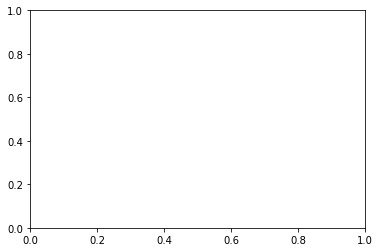

In [53]:
#brain scores and age
x=sm.add_constant(df_demo['Age_in_Yrs'].values)
y=df_brainscores['LV1'].values
model = sm.OLS(y, x).fit() ## sm.OLS(output, input) #(y, X)
print(model.summary()) 
plt.scatter(x,y)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.174
Date:                Tue, 07 Sep 2021   Prob (F-statistic):              0.279
Time:                        13:01:47   Log-Likelihood:                -2911.8
No. Observations:                 380   AIC:                             5828.
Df Residuals:                     378   BIC:                             5835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1209.2490    203.516      5.942      0.0

ValueError: x and y must be the same size

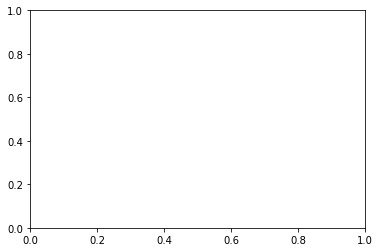

In [52]:
#behav scores and age
x=sm.add_constant(df_demo['Age_in_Yrs'].values)
y=df_behavscores['LV1'].values
model = sm.OLS(y, x).fit() ## sm.OLS(output, input) #(y, X)
print(model.summary()) 
plt.scatter(x,y)
plt.show()

In [50]:
df_sex_effects=pd.concat((df_brainscores[['LV1']], df_demo[['Gender']]),axis=1)
mod = smf.ols(formula='LV1 ~ Gender', data=df_sex_effects)
res=mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                    LV1   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     14.04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           0.000207
Time:                        13:00:40   Log-Likelihood:                 57.616
No. Observations:                 380   AIC:                            -111.2
Df Residuals:                     378   BIC:                            -103.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1575      0.015     10.656      

In [51]:
df_sex_effects=pd.concat((df_behavscores[['LV1']], df_demo[['Gender']]),axis=1)
mod = smf.ols(formula='LV1 ~ Gender', data=df_sex_effects)
res=mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                    LV1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.008929
Date:                Tue, 07 Sep 2021   Prob (F-statistic):              0.925
Time:                        13:01:15   Log-Likelihood:                -2912.4
No. Observations:                 380   AIC:                             5829.
Df Residuals:                     378   BIC:                             5837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1430.2516     36.641     39.034      